In [ ]:
!pip install easyocr

# 1. Edge Detection

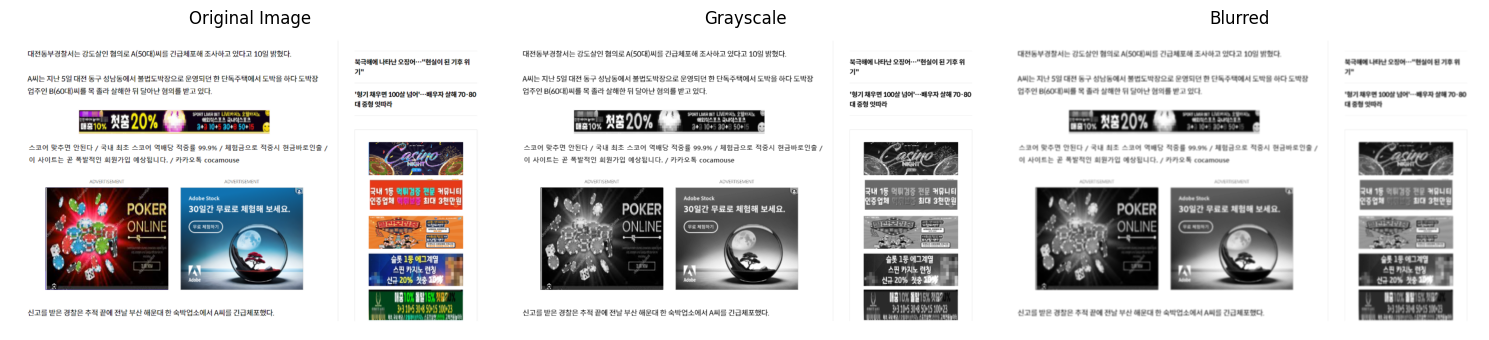

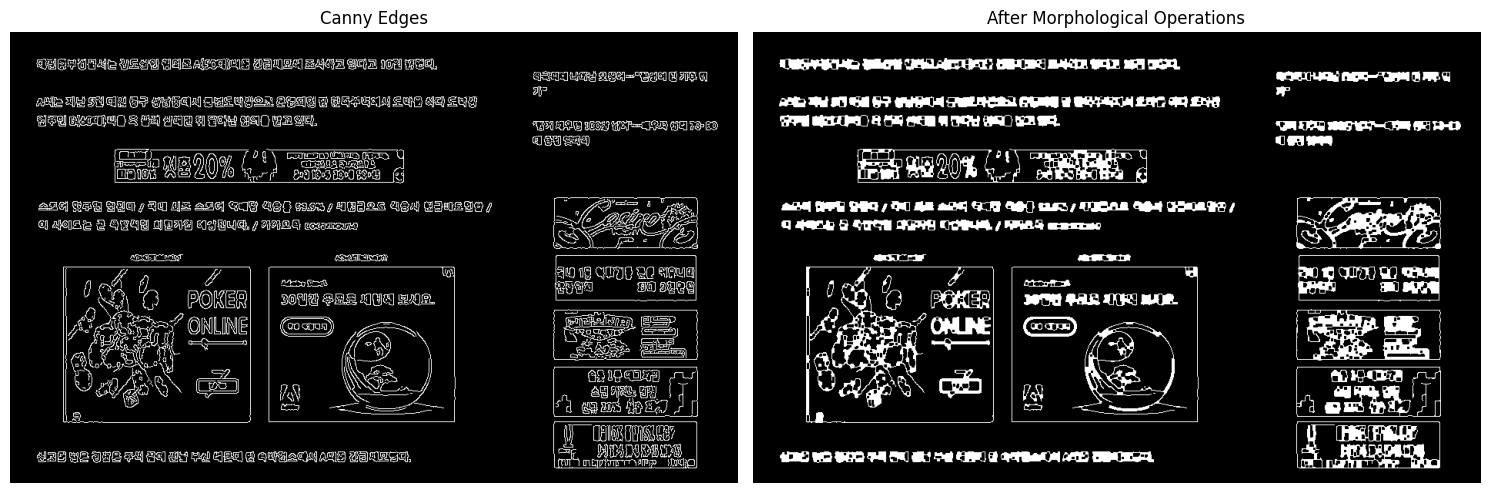

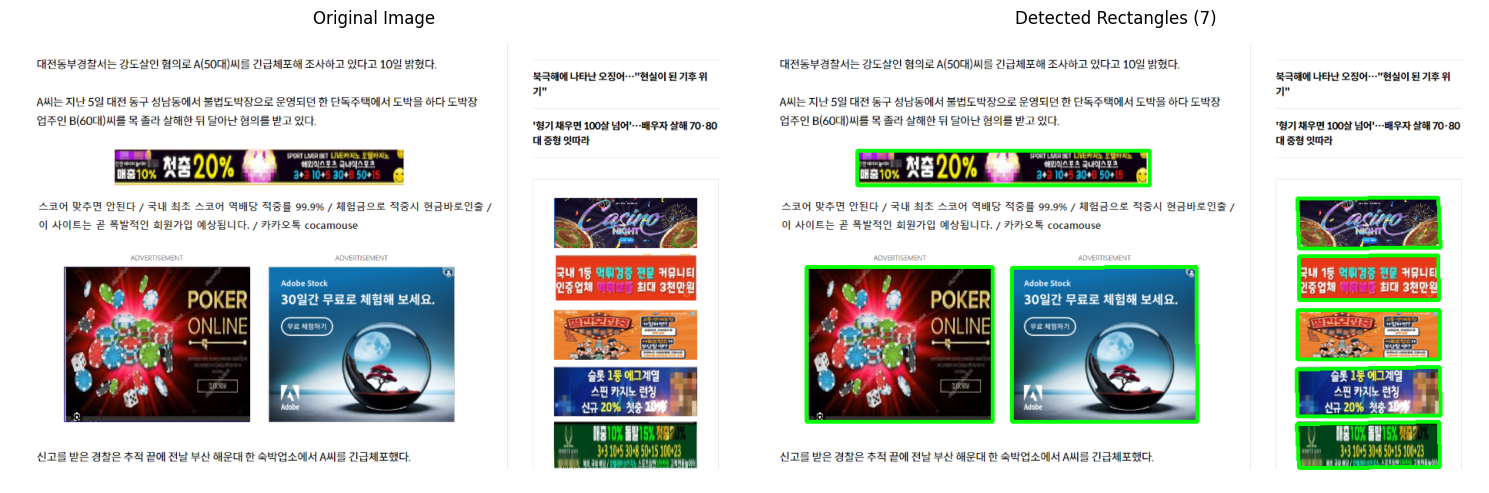

총 7개의 사각형이 검출되었습니다.

사각형 13:
- 면적: 11136.50 픽셀
- 둘레: 489.07 픽셀
- 회전 각도: 90.00도

사각형 14:
- 면적: 11952.00 픽셀
- 둘레: 500.49 픽셀
- 회전 각도: 90.00도

사각형 15:
- 면적: 11925.00 픽셀
- 둘레: 507.94 픽셀
- 회전 각도: 0.00도

사각형 16:
- 면적: 48459.00 픽셀
- 둘레: 884.49 픽셀
- 회전 각도: 90.00도

사각형 17:
- 면적: 49053.00 픽셀
- 둘레: 891.80 픽셀
- 회전 각도: -0.00도

사각형 18:
- 면적: 10582.00 픽셀
- 둘레: 485.46 픽셀
- 회전 각도: 90.00도

사각형 46:
- 면적: 12110.50 픽셀
- 둘레: 520.12 픽셀
- 회전 각도: 90.00도



In [28]:
# 필요한 라이브러리 임포트
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplotlib을 이용해 이미지를 표시하는 함수
def show_images(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # 그레이스케일 이미지
            plt.imshow(img, cmap='gray')
        else:  # BGR to RGB 변환
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 1. 이미지 로드 및 전처리
# 이미지 경로 설정
image_path = "/content/sample_data/KakaoTalk_Photo_2024-10-12-04-03-40.png"

# 이미지 읽기
image = cv2.imread(image_path)
# 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 가우시안 블러 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 결과 시각화
show_images([image, gray, blurred],
           ['Original Image', 'Grayscale', 'Blurred'])

# 2. 캐니 엣지 검출 및 이진화
# 캐니 엣지 검출
# minVal과 maxVal은 각각 엣지 검출의 하한값과 상한값
edges = cv2.Canny(blurred, 50, 150)

# 모폴로지 연산으로 엣지 보강
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
binary = cv2.erode(dilated, kernel, iterations=1)

# 결과 시각화
show_images([edges, binary],
           ['Canny Edges', 'After Morphological Operations'])

# 3. 사각형 검출
# 결과 이미지 복사
result = image.copy()

# 윤곽선 찾기
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
'''
contours = list(contours)

contours.append([[130, 150], [130, 190], [510, 150], [510, 190]])
'''
# 검출된 사각형 개수를 저장할 변수
rectangle_count = 0

# 각 윤곽선에 대해 처리
for cnt in contours:
    # 윤곽선 길이 계산
    peri = cv2.arcLength(cnt, True)
    # 근사화
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)

    # 사각형 검출 (4개의 꼭지점을 가진 경우)
    if len(approx) == 4:
        # 면적 계산
        area = cv2.contourArea(cnt)
        # 너무 작은 사각형 필터링
        if area > 1000:
            # 사각형 그리기
            cv2.drawContours(result, [approx], -1, (0, 255, 0), 3)
            rectangle_count += 1

cv2.rectangle(result, (135,155),(515,200), (0, 255, 0), 3)


# 결과 시각화
show_images([image, result],
           ['Original Image', f'Detected Rectangles ({rectangle_count})'])

# 4. 검출된 사각형의 정보 출력
print(f"총 {rectangle_count}개의 사각형이 검출되었습니다.\n")

# 각 사각형의 정보 출력
for i, cnt in enumerate(contours):
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)

    if len(approx) == 4:
        area = cv2.contourArea(cnt)
        if area > 1000:
            print(f"사각형 {i+1}:")
            print(f"- 면적: {area:.2f} 픽셀")
            print(f"- 둘레: {peri:.2f} 픽셀")

            # 사각형의 각도 계산
            rect = cv2.minAreaRect(cnt)
            angle = rect[-1]
            print(f"- 회전 각도: {angle:.2f}도")
            print()

# 5. 캐니 엣지 매개변수 조정을 위한 트랙바 함수 (선택사항)
def nothing(x):
    pass

def adjust_canny_params():
    # 윈도우 생성
    cv2.namedWindow('Canny Edge Detection')

    # 트랙바 생성
    cv2.createTrackbar('Min Value', 'Canny Edge Detection', 50, 255, nothing)
    cv2.createTrackbar('Max Value', 'Canny Edge Detection', 150, 255, nothing)

    while True:
        # 트랙바에서 값 읽기
        min_val = cv2.getTrackbarPos('Min Value', 'Canny Edge Detection')
        max_val = cv2.getTrackbarPos('Max Value', 'Canny Edge Detection')

        # 캐니 엣지 검출 적용
        edges = cv2.Canny(blurred, min_val, max_val)

        # 결과 표시
        cv2.imshow('Canny Edge Detection', edges)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()

x:130, 510
y:150, 190

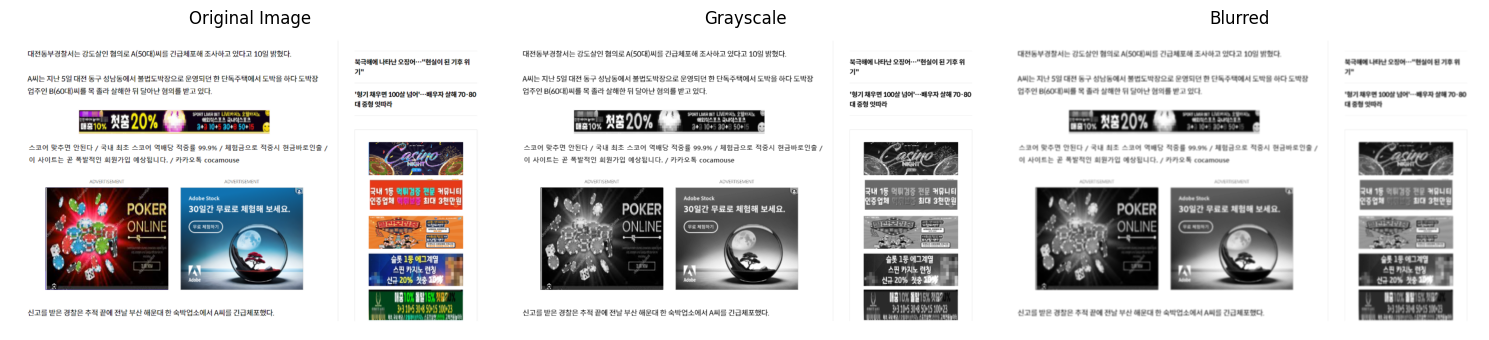

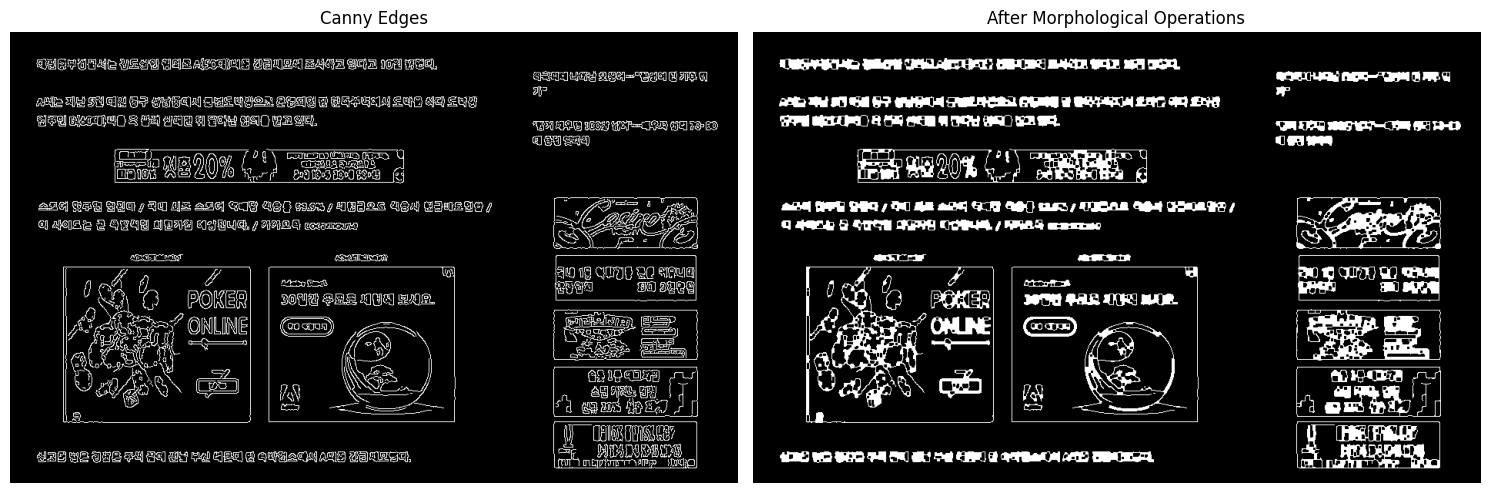

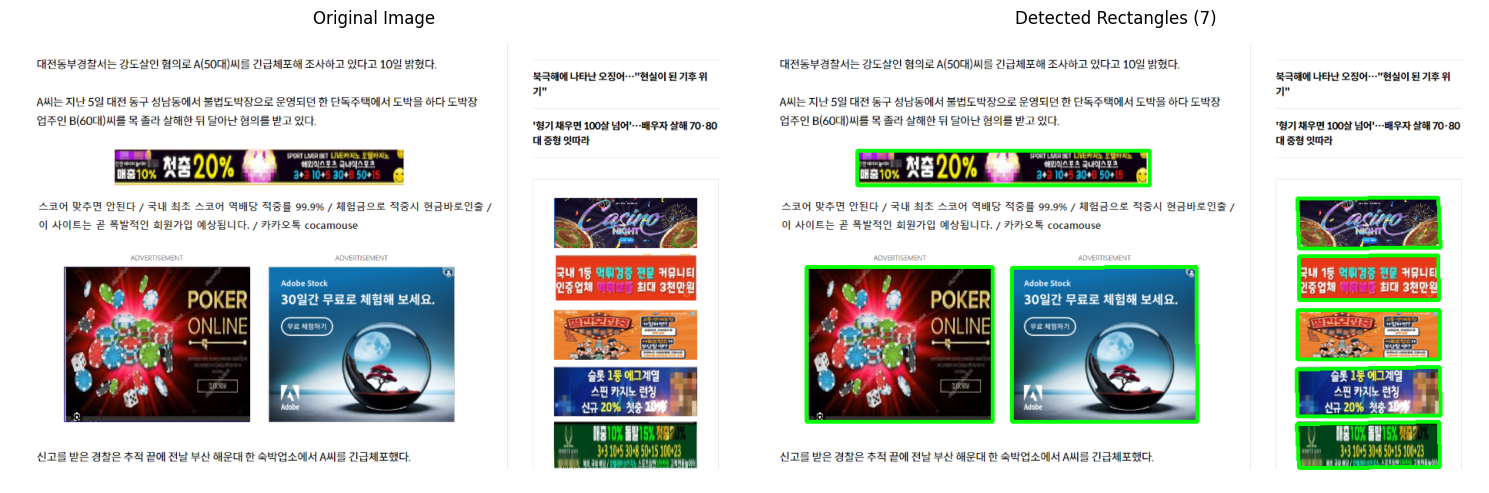

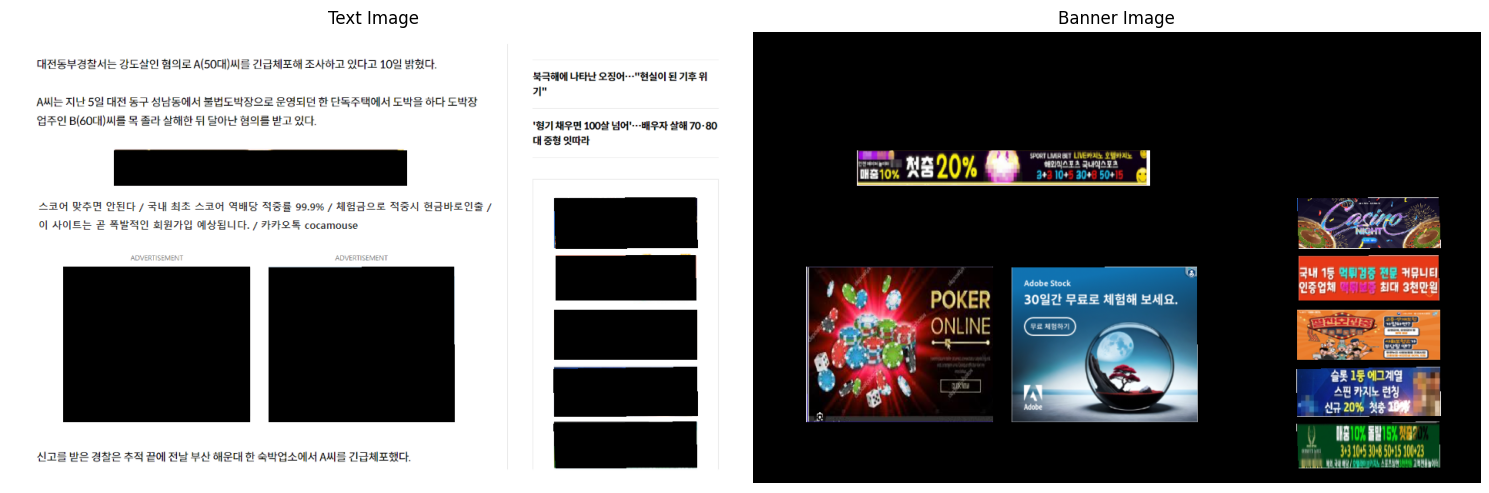

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplotlib을 이용해 이미지를 표시하는 함수
def show_images(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # 그레이스케일 이미지
            plt.imshow(img, cmap='gray')
        else:  # BGR to RGB 변환
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 1. 이미지 로드 및 전처리
image_path = "/content/sample_data/KakaoTalk_Photo_2024-10-12-04-03-40.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 결과 시각화
show_images([image, gray, blurred], ['Original Image', 'Grayscale', 'Blurred'])

# 2. 캐니 엣지 검출 및 이진화
edges = cv2.Canny(blurred, 50, 150)
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
binary = cv2.erode(dilated, kernel, iterations=1)

# 결과 시각화
show_images([edges, binary], ['Canny Edges', 'After Morphological Operations'])

# 3. 사각형 검출
result = image.copy()
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rectangle_count = 0

# 마스크 생성
mask = np.zeros_like(image)


#banner 좌표
banner_coors=[]

# 각 윤곽선에 대해 처리
for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)

    if len(approx) == 4:
        area = cv2.contourArea(cnt)
        if area > 1000:
            # 사각형 그리기
            banner_coors.append(approx.reshape(4,2))
            cv2.drawContours(result, [approx], -1, (0, 255, 0), 3)
            cv2.drawContours(mask, [approx], -1, (255, 255, 255), -1)  # 마스크에 사각형 그리기
            rectangle_count += 1

# 추가한 사각형 그리기
additional_rect = np.array([[135, 155], [135, 200], [515, 200], [515, 155]], dtype=np.int32)
cv2.drawContours(result, [additional_rect], -1, (0, 255, 0), 3)
cv2.drawContours(mask, [additional_rect], -1, (255, 255, 255), -1)  # 마스크에 추가한 사각형 그리기
banner_coors.append(additional_rect.reshape(4,2))
# 결과 시각화
show_images([image, result], ['Original Image', f'Detected Rectangles ({rectangle_count})'])

# 마스크 반전
inverse_mask = cv2.bitwise_not(mask)  # 0과 255를 반전

# 색깔이 반전되지 않은 이미지 추출
banner_image = cv2.bitwise_and(image, mask)  # 원래 이미지에서 마스크 부분만 남김
text_image = cv2.bitwise_and(image, inverse_mask)  # 원래 이미지에서 마스크 부분을 제외한 부분

# 결과 시각화
show_images([text_image, banner_image], ['Text Image', 'Banner Image'])



In [94]:
np.array(banner_coors).shape

(8, 4, 2)

In [73]:
import easyocr
reader=easyocr.Reader(['ko','en'])
text_result=reader.readtext(text_image)

In [74]:
banner_result=reader.readtext(banner_image)

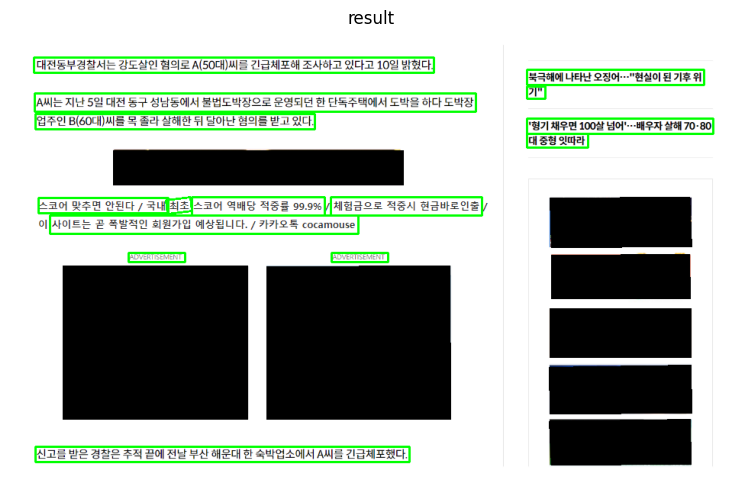

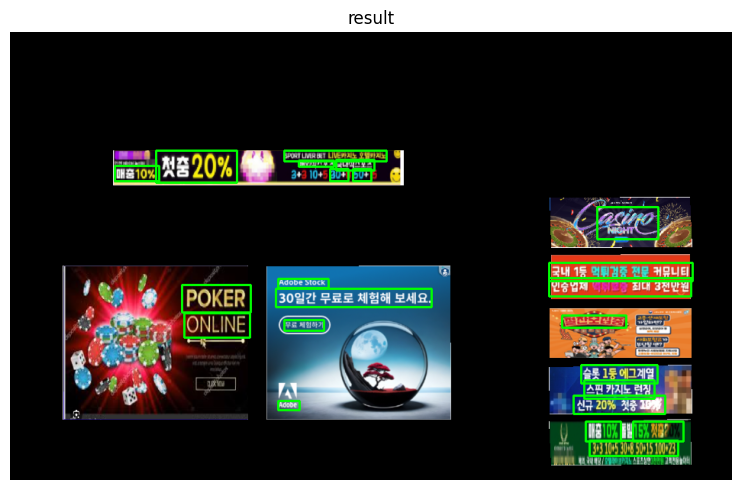

In [80]:
def draw_boxes_and_texts(image, boxes_and_texts):
    for box, text, confidence in boxes_and_texts:
        # box 좌표는 네 개의 점으로 이루어진 리스트
        pts = np.array(box, np.int32)
        pts = pts.reshape((-1, 1, 2))

        # 바운딩박스 그리기
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        # 텍스트를 바운딩박스 위에 표시
        #text_position = (int(box[0][0]), int(box[0][1]) - 10)# 첫 번째 좌표 위에 텍스트 표시
        '''
        cv2.putText(image, f'{text} ', text_position, cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 2, cv2.LINE_AA)
        '''

    show_images([image],['result'])

# 바운딩박스와 텍스트 그리기
draw_boxes_and_texts(text_image, text_result)
draw_boxes_and_texts(banner_image, banner_result)
#banner_ocr=draw_boxes_and_texts(banner_image,banner_result)
# 결과 이미지 보기

In [88]:
banner_result

[([[359, 155], [493, 155], [493, 169], [359, 169]],
  'SAIUUWT UIVEIA: 오다카사노',
  0.010983150585596846),
 ([[191, 155], [297, 155], [297, 197], [191, 197]],
  '젓출20%',
  0.07870350372889244),
 ([[378, 168], [424, 168], [424, 176], [378, 176]],
  '태기미h nA',
  0.014748993100693709),
 ([[427, 167], [477, 167], [477, 181], [427, 181]],
  '3내지스무?',
  0.01628095820107737),
 ([[137, 175], [195, 175], [195, 195], [137, 195]],
  '매춘104',
  0.07732505331872563),
 ([[419, 179], [443, 179], [443, 195], [419, 195]], '30+', 0.7843549332389201),
 ([[449, 179], [473, 179], [473, 195], [449, 195]], '50*', 0.7904193230953107),
 ([[769, 229], [849, 229], [849, 271], [769, 271]], '%@', 0.10179083250086089),
 ([[706, 302], [894, 302], [894, 326], [706, 326]],
  '국내 1동 먹뒤감중 전문 커유니터',
  0.10619317527437275),
 ([[351, 323], [417, 323], [417, 335], [351, 335]],
  'Adobe Stock',
  0.9184742723684016),
 ([[706, 322], [892, 322], [892, 346], [706, 346]],
  '인중업체 깨리스로 최대 3천만원',
  0.0747324392029234),
 ([[225, 331],

In [118]:
np.array(banner_result[0][0]).mean(axis = 0)

array([426., 162.])

In [120]:
banner_ocr_center_coors=[]
for x in banner_result:
    banner_ocr_center_coors.append(np.array(x[0]).mean(axis = 0))


In [121]:
banner_ocr_center_coors

[array([426., 162.]),
 array([244., 176.]),
 array([401., 172.]),
 array([452., 174.]),
 array([166., 185.]),
 array([431., 187.]),
 array([461., 187.]),
 array([809., 250.]),
 array([800., 314.]),
 array([384., 329.]),
 array([799., 334.]),
 array([270., 349.]),
 array([450., 348.]),
 array([271., 384.]),
 array([385., 384.]),
 array([765., 379.]),
 array([798., 448.]),
 array([798., 468.]),
 array([365., 489.]),
 array([798., 488.]),
 array([777., 523.]),
 array([849., 523.]),
 array([817., 545.])]

In [127]:
banner_corr_center = np.array(banner_coors).mean(axis = 1)

In [131]:
closest_indices = []

for center in banner_ocr_center_coors:
    # 유클리드 거리 계산
    distances = np.linalg.norm(banner_corr_center - center, axis=1)

    # 가장 가까운 인덱스 찾기
    closest_index = np.argmin(distances)
    closest_indices.append(closest_index)

In [132]:
closest_indices

[7, 7, 7, 7, 7, 7, 7, 6, 5, 3, 5, 4, 3, 4, 3, 2, 1, 1, 3, 1, 0, 0, 0]

In [139]:
instruction = ' '.join(text_result[i][1].strip() for i in range(len(text_result)))


In [144]:
meta_instructions = {}
for i in range(len(banner_corr_center)):
    center_position = banner_corr_center[i]
    indices_of_i = [index for index, value in enumerate(closest_indices) if value == i]
    meta_instruction = ' '.join(banner_result[i][1].strip() for i in indices_of_i)
    meta_instructions[i] = {'center_postion' : center_position, 'text' : meta_instruction}

In [146]:
str(meta_instructions)

"{0: {'center_postion': array([799.5, 537.5]), 'text': 'II에 [태)내 JIIIUIDISIM2I'}, 1: {'center_postion': array([799.5, 468.5]), 'text': '슬못 그동에그계면 스편 카지노 런칭 신규 2096 첫중 1'}, 2: {'center_postion': array([799.5, 394. ]), 'text': '{표팔과 3'}, 3: {'center_postion': array([456.25, 406.75]), 'text': 'Adobe Stock 30일간 무료로 체험해 보세요. 무료 기법하가 Auooe'}, 4: {'center_postion': array([190. , 406.5]), 'text': 'POKER ONLINE'}, 5: {'center_postion': array([799.75, 320.25]), 'text': '국내 1동 먹뒤감중 전문 커유니터 인중업체 깨리스로 최대 3천만원'}, 6: {'center_postion': array([799.75, 249.  ]), 'text': '%@'}, 7: {'center_postion': array([325. , 177.5]), 'text': 'SAIUUWT UIVEIA: 오다카사노 젓출20% 태기미h nA 3내지스무? 매춘104 30+ 50*'}}"

In [150]:
prompt_format = f"""#### LLM을 위한 지침:
당신은 악성 도박 광고를 탐지하고 처리하도록 설계된 시스템입니다. 당신의 임무는 광고의 텍스트를 정제하고 이미지 분석에 기반하여 중심 위치를 탐지하는 것입니다. 다음 단계에 따라 출력을 생성하세요.

#### 입력:
1. **텍스트**: {instruction}
2. **이미지**: {'<image>'*16}  # 이미지의 비전 토큰이 16개로 반복됨
3. **메타데이터**: {str(meta_instructions)}

#### 작업:
1. **텍스트 정제**: 주어진 텍스트를 처리하여 도박 관련 내용을 제거합니다.
2. **중심 위치 탐지**: 이미지의 비전 토큰과 제공된 메타데이터를 분석하여 악성 도박 광고의 중심 위치를 결정합니다.
3. **출력 형식**: 출력에는 정제된 텍스트와 탐지된 악성 광고의 중심 위치가 포함되어야 합니다.

#### 출력 형식:
```json
{{
  "clean_text": "<도박 관련 내용이 제거된 텍스트>",
  "ad_center_position": "<악성 도박 광고의 중심 위치>"
}}
"""

In [151]:
prompt_format

'#### LLM을 위한 지침: \n당신은 악성 도박 광고를 탐지하고 처리하도록 설계된 시스템입니다. 당신의 임무는 광고의 텍스트를 정제하고 이미지 분석에 기반하여 중심 위치를 탐지하는 것입니다. 다음 단계에 따라 출력을 생성하세요.\n\n#### 입력: \n1. **텍스트**: 대전동부경찰서논 강노살인 형의로 A(5O대)씨루 긴급체포해 조사하고 있다고 10일 밝화다. 북극해에 나타난 오징어: ."현실이 된 기후위 기" A씨는 지난 5일 대천 동구 성남동에서 불법도박장으로 운영되던 한 단독주택에서 도박물 하다 도박장 업주인 B(6O대) 씨틀 목 콜라 살해한 뒤 달아난 형의틀 반고 있다 \'형기채우면 100살 넘어\' . 배우자 실해 70.80 대 중형 잇따라 스코어 맞추면 안되다 / 국내 스코어 역배당 적중률 99.9% 체험금으로 적중시 현금바로인출 사이트는 곧 폭발적인 회원가입 예상되니다. / 카카오록 cocamouse AUVERTISEMEAT ADVERTSEMEhT 신고들 받은 경찰은 추적 끝에 전날 부산 해운대 한 숙박업소메서 A씨률 긴급체포하다 최초\n2. **이미지**: <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image>  # 이미지의 비전 토큰이 16개로 반복됨\n3. **메타데이터**: {0: {\'center_postion\': array([799.5, 537.5]), \'text\': \'II에 [태)내 JIIIUIDISIM2I\'}, 1: {\'center_postion\': array([799.5, 468.5]), \'text\': \'슬못 그동에그계면 스편 카지노 런칭 신규 2096 첫중 1\'}, 2: {\'center_postion\': array([799.5, 394. ]), \'text\': \'{표팔과 3\'}, 3: {\'center_postion\': array([456.25, 

#### LLM을 위한 지침:
당신은 악성 도박 광고를 탐지하고 처리하도록 설계된 시스템입니다. 당신의 임무는 광고의 텍스트를 정제하고 이미지 분석에 기반하여 중심 위치를 탐지하는 것입니다. 다음 단계에 따라 출력을 생성하세요.

#### 입력:
1. **텍스트**: 대전동부경찰서논 강노살인 형의로 A(5O대)씨루 긴급체포해 조사하고 있다고 10일 밝화다. 북극해에 나타난 오징어: ."현실이 된 기후위 기" A씨는 지난 5일 대천 동구 성남동에서 불법도박장으로 운영되던 한 단독주택에서 도박물 하다 도박장 업주인 B(6O대) 씨틀 목 콜라 살해한 뒤 달아난 형의틀 반고 있다 '형기채우면 100살 넘어' . 배우자 실해 70.80 대 중형 잇따라 스코어 맞추면 안되다 / 국내 스코어 역배당 적중률 99.9% 체험금으로 적중시 현금바로인출 사이트는 곧 폭발적인 회원가입 예상되니다. / 카카오록 cocamouse AUVERTISEMEAT ADVERTSEMEhT 신고들 받은 경찰은 추적 끝에 전날 부산 해운대 한 숙박업소메서 A씨률 긴급체포하다 최초
2. **이미지**: <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image>  # 이미지의 비전 토큰이 16개로 반복됨
3. **메타데이터**: {0: {'center_postion': array([799.5, 537.5]), 'text': 'II에 [태)내 JIIIUIDISIM2I'}, 1: {'center_postion': array([799.5, 468.5]), 'text': '슬못 그동에그계면 스편 카지노 런칭 신규 2096 첫중 1'}, 2: {'center_postion': array([799.5, 394. ]), 'text': '{표팔과 3'}, 3: {'center_postion': array([456.25, 406.75]), 'text': 'Adobe Stock 30일간 무료로 체험해 보세요. 무료 기법하가 Auooe'}, 4: {'center_postion': array([190. , 406.5]), 'text': 'POKER ONLINE'}, 5: {'center_postion': array([799.75, 320.25]), 'text': '국내 1동 먹뒤감중 전문 커유니터 인중업체 깨리스로 최대 3천만원'}, 6: {'center_postion': array([799.75, 249.  ]), 'text': '%@'}, 7: {'center_postion': array([325. , 177.5]), 'text': 'SAIUUWT UIVEIA: 오다카사노 젓출20% 태기미h nA 3내지스무? 매춘104 30+ 50*'}}

#### 작업:
1. **텍스트 정제**: 주어진 텍스트를 처리하여 도박 관련 내용을 제거합니다.
2. **중심 위치 탐지**: 이미지의 비전 토큰과 제공된 메타데이터를 분석하여 악성 도박 광고의 중심 위치를 결정합니다.
3. **출력 형식**: 출력에는 정제된 텍스트와 탐지된 악성 광고의 중심 위치가 포함되어야 합니다.

#### 출력 형식:
```json
{
  "clean_text": "<도박 관련 내용이 제거된 텍스트>",
  "ad_center_position": "<악성 도박 광고의 중심 위치>"
}


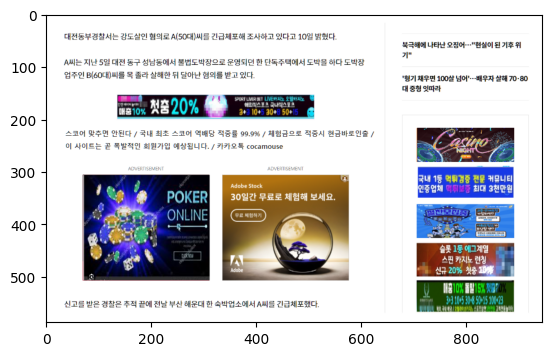

In [152]:
plt.imshow(image)